## 摄像头校准

相机的成像过程实质上是坐标系的转换。首先空间中的点由 “世界坐标系” 转换到 “像机坐标系”，然后再将其投影到成像平面 ( 图像物理坐标系 ) ，最后再将成像平面上的数据转换到 图像像素坐标系。但是由于透镜制造精度以及组装工艺的偏差会引入畸变，导致原始图像的失真。镜头的畸变分为径向畸变和切向畸变两类。

#### 径向畸变

径向畸变有三个系数$k_{1}, k_{2}, k_{3}$,矫正的时候可以使用公式:
$$
x_{0} = x(1+k_{1}r^{2}+k_{2}r^{4}+k_{3}r^{6})\\
y_{0} = y(1+k_{1}r^{2}+k_{2}r^{4}+k_{3}r^{6})
$$
其中$(x_{0}, y_{0})$是畸变在成像的原始位置是畸变在成像的原始位置是畸变在成像的原始位置是畸变在成像的原始位置,$(x, y)$是畸变校准后的新位置


#### 切向畸变

切向畸变是由于透镜本身与相机传感器平面（成像平面）或图像平面不平行而产生的，这种情况多是由于透镜被粘贴到镜头模组上的安装偏差导致。切向畸变可以用两个参数$p_{1}, p_{2}$描述:
$$
x_{0} = x +[2p_{1}y+p_{2}(r^{2}+2x^{2})] \\
y_{0} = y +[2p_{2}x+p_{1}(r^{2}+2y^{2})]
$$

#### 畸变校准
为了正确的识别图像中的车道，首先需要消除图像中的径向偏差。计算机视觉专家们找到了一种有效的方式来修正径向偏差：首先将图像转换成棋盘模型，然后校正摄像头，使获得的图像中白色和黑色格子达到相同规尺度。

为了修正失真效应，需要识别棋盘的中心并利用期望的棋盘尺度来计算失真系数，并用其来消除图像的径向失真。

### 寻找角点
使用Opencv的`findChessboardCorners()`与`drawCessboardCorners()`函数来自动找到并标出图中角点

In [5]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

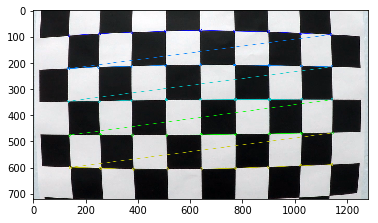

In [15]:
# prepare object points


# Make a list of calibration images
fname = './img/calibration1.jpg'
img = cv2.imread(fname)

# Convert to grayscale
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

# Find the chessboard corners
nx = 9
ny = 5
ret, corners = cv2.findChessboardCorners(gray, (nx, ny), None)

# If found, draw corners
if ret == True:
    # Draw and display the corners
    cv2.drawChessboardCorners(img, (nx, ny), corners, ret)
    plt.imshow(img)


In [ ]:
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, gray.shape[::-1], None, None)
dst = cv2.undistort(img, mtx, dist, None, mtx)